## Import Libraires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Dataset Read

In [ ]:
file_path = "/content/drive/MyDrive/DM and ML Project/Copy of train_u6lujuX_CVtuZ9i (1).csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Visualization

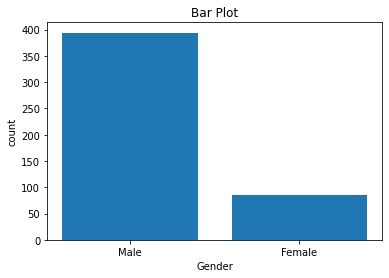

In [ ]:
#barplot
data = df['Gender'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Gender')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

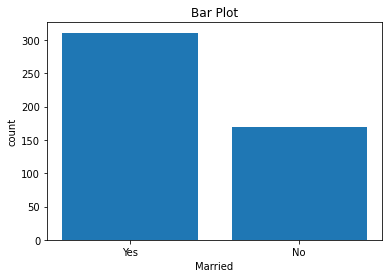

In [ ]:
#barplot
data = df['Married'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Married')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

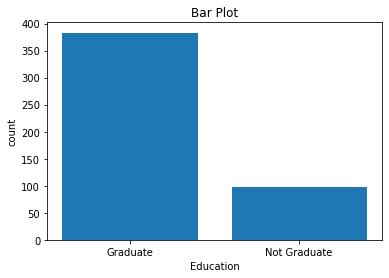

In [ ]:
#barplot
data = df['Education'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Education')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

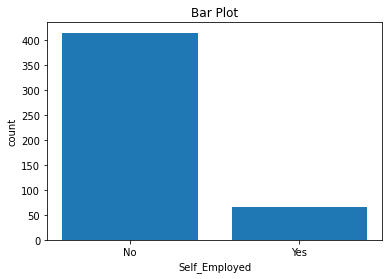

In [ ]:
#barplot
data = df['Self_Employed'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Self_Employed')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

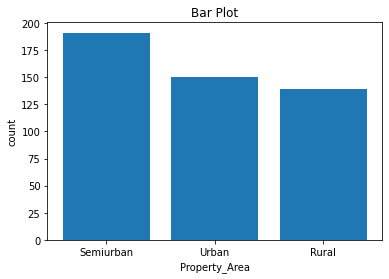

In [ ]:
#barplot
data = df['Property_Area'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Property_Area')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

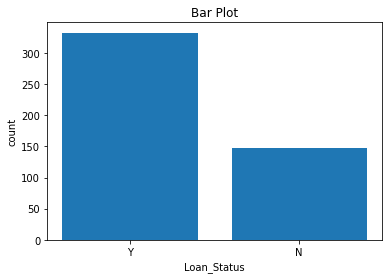

In [ ]:
#barplot
data = df['Loan_Status'].value_counts()
name = data.index
count =data.values
plt.title("Bar Plot")
plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.bar(name,count)
plt.show()

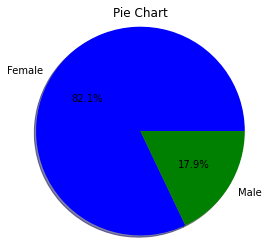

In [ ]:
#pie chart
slices =  df['Gender'].value_counts()
label = ["Female","Male"]
color = ["b","g"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


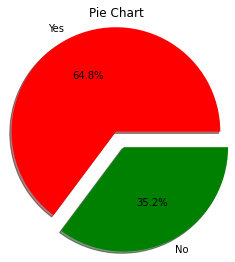

In [ ]:
#pie chart
slices =  df['Married'].value_counts()
label = ["Yes","No"]
color = ["r","g"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0.2),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


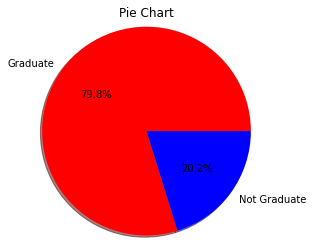

In [ ]:
#pie chart
slices =  df['Education'].value_counts()
label = ["Graduate","Not Graduate"]
color = ["r","b"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


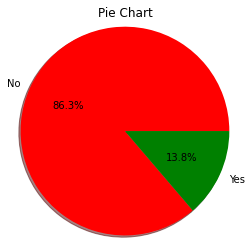

In [ ]:
#pie chart
slices =  df['Self_Employed'].value_counts()
label = ["No","Yes"]
color = ["r","g"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


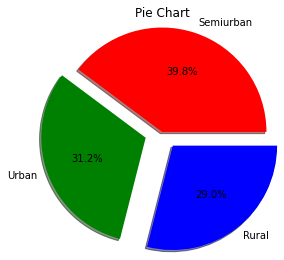

In [ ]:
#pie chart
slices =  df['Property_Area'].value_counts()
label = ["Semiurban","Urban","Rural"]
color = ["r","g","b"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0.2,0.2),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


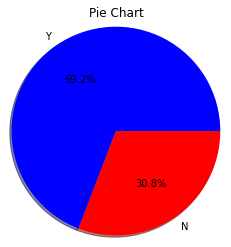

In [ ]:
#pie chart
slices =  df['Loan_Status'].value_counts()
label = ["Y","N"]
color = ["b","r"]
plt.title("Pie Chart")
plt.pie(
    slices,
    explode = (0,0),
    labels = label,
    colors = color,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 0,
    radius = 1.2
)
plt.show()


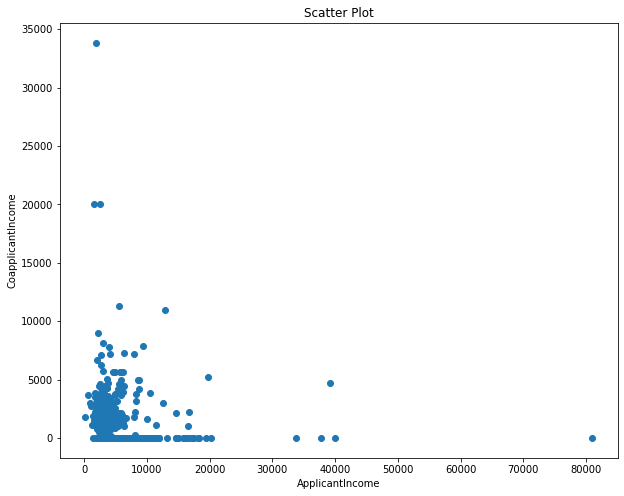

In [ ]:
fig,ax = plt.subplots()
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('Scatter Plot')
ax.scatter(df['ApplicantIncome'],df['CoapplicantIncome'])
fig.set_size_inches(10,8)

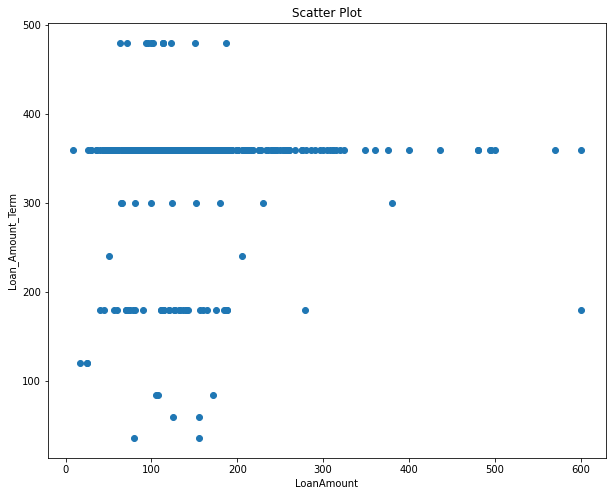

In [ ]:
fig,ax = plt.subplots()
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.title('Scatter Plot')
ax.scatter(df['LoanAmount'],df['Loan_Amount_Term'])
fig.set_size_inches(10,8)

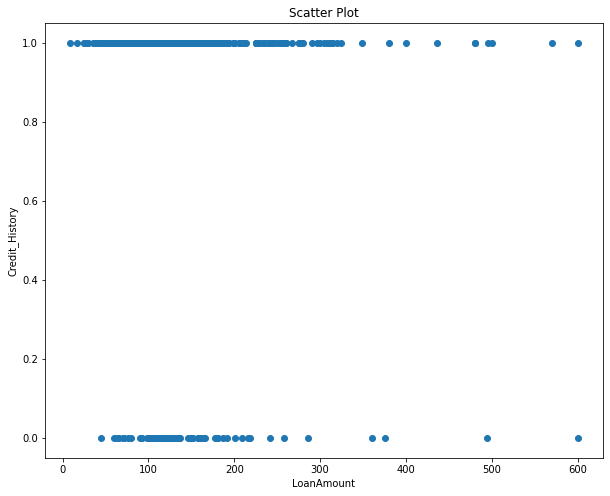

In [ ]:
fig,ax = plt.subplots()
plt.xlabel('LoanAmount')
plt.ylabel('Credit_History')
plt.title('Scatter Plot')
ax.scatter(df['LoanAmount'],df['Credit_History'])
fig.set_size_inches(10,8)

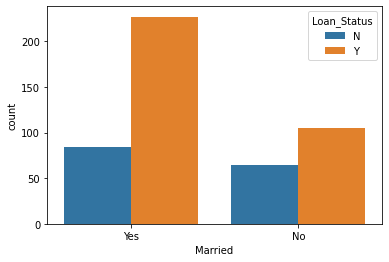

In [ ]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)

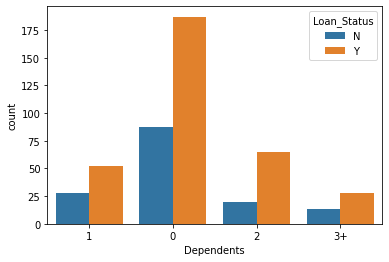

In [ ]:
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df)

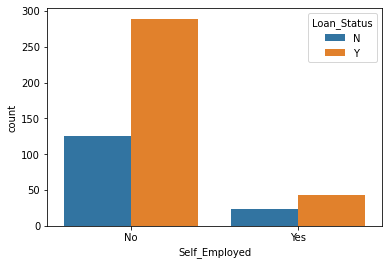

In [ ]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = df)

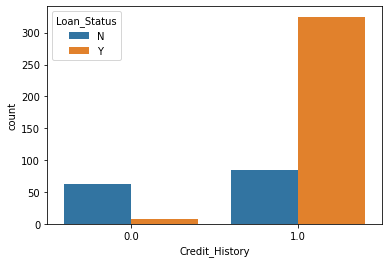

In [ ]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = df)

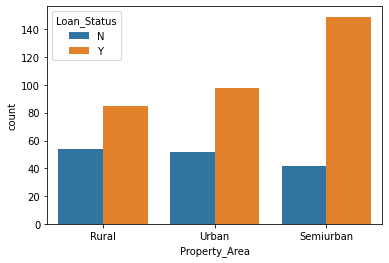

In [ ]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = df)

#Data Preprocessing

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
l = LabelEncoder()

In [ ]:
df['Loan_Status']= l.fit_transform(df.Loan_Status)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Gender']= l.fit_transform(df.Gender)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Married']= l.fit_transform(df.Married)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Education']= l.fit_transform(df.Education)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Property_Area']= l.fit_transform(df.Property_Area)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Self_Employed']= l.fit_transform(df.Self_Employed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Dependents']= l.fit_transform(df.Dependents)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
correlation = df.corr()


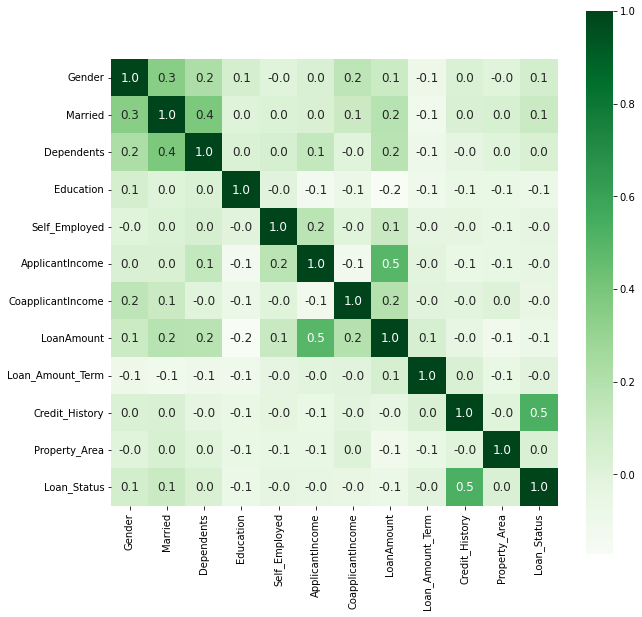

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='Greens', cbar = True, square = True, fmt = '.1f', annot=True, annot_kws={'size': 12})


Data Spliting into feature and target

In [ ]:
# Spliting
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

Data Scaling

In [ ]:
M = MinMaxScaler(feature_range=(0,1))

In [ ]:
X = M.fit_transform(X)
X

array([[1.        , 1.        , 0.33333333, ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.72972973, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.72972973, 0.        ,
        0.5       ]])

Train Test Spliting

In [ ]:
#spliting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


#Model Training

Linear Regression

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Linear_train = lin.score(X_train,Y_train)
Linear_train

0.2966601601864116

In [ ]:
Linear_test = lin.score(X_test,Y_test)
Linear_test

0.3048507622044546

Logistic Regression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Logistic_train = log.score(X_train,Y_train)
Logistic_train

0.8046875

In [ ]:
Logistic_test = log.score(X_test,Y_test)
Logistic_test

0.8229166666666666

In [ ]:
Y_prediction = log.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.82      0.95      0.88        66

    accuracy                           0.82        96
   macro avg       0.83      0.74      0.77        96
weighted avg       0.83      0.82      0.81        96



KNeighborClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knc.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
Knc_train = knc.score(X_train,Y_train)
Knc_train

0.8125

In [ ]:
Knc_test = knc.score(X_test,Y_test)
Knc_test

0.8125

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


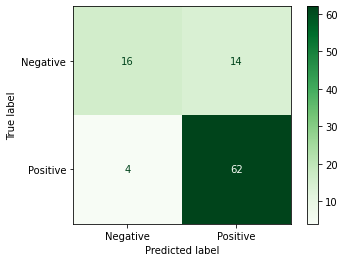

In [ ]:
plot_confusion_matrix(knc,X_test,Y_test, cmap ="Greens", display_labels=['Negative','Positive'])
plt.show()

In [ ]:
Y_prediction = knc.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.82      0.94      0.87        66

    accuracy                           0.81        96
   macro avg       0.81      0.74      0.76        96
weighted avg       0.81      0.81      0.80        96



KNeighborRegressor

In [ ]:
knr = KNeighborsRegressor()

In [ ]:
knr.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
Knr_train = knr.score(X_train,Y_train)
Knr_train

0.41668408308907856

In [ ]:
Knr_test = knr.score(X_test,Y_test)
Knr_test

0.28436363636363626

Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Dtc_train = dt.score(X_train,Y_train)
Dtc_train

1.0

In [ ]:
Dtc_test = dt.score(X_test,Y_test)
Dtc_test

0.6770833333333334

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


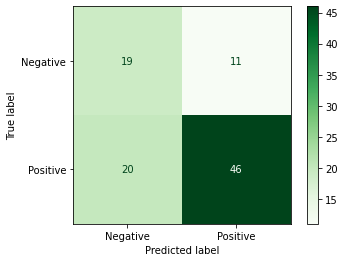

In [ ]:
plot_confusion_matrix(dt,X_test,Y_test, cmap ="Greens", display_labels=['Negative','Positive'])
plt.show()

In [ ]:
Y_prediction = dt.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.49      0.63      0.55        30
           1       0.81      0.70      0.75        66

    accuracy                           0.68        96
   macro avg       0.65      0.67      0.65        96
weighted avg       0.71      0.68      0.69        96



Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Rfc_train = rfc.score(X_train,Y_train)
Rfc_train

1.0

In [ ]:
Rfc_test = rfc.score(X_test,Y_test)
Rfc_test

0.8333333333333334

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


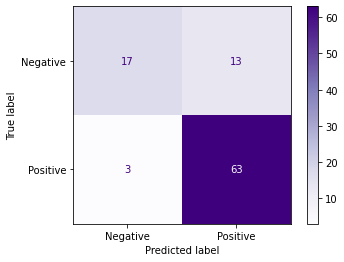

In [ ]:
plot_confusion_matrix(rfc,X_test,Y_test, cmap ="Purples", display_labels=['Negative','Positive'])
plt.show()

In [ ]:
Y_prediction = rfc.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96



Naive Bayes

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
Mnb_train = mnb.score(X_train,Y_train)
Mnb_train

0.6953125

In [ ]:
Mnb_test = mnb.score(X_test,Y_test)
Mnb_test

0.6979166666666666

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


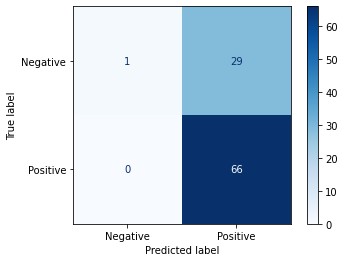

In [ ]:
plot_confusion_matrix(mnb,X_test,Y_test, cmap ="Blues", display_labels=['Negative','Positive'])
plt.show()

In [ ]:
Y_prediction = mnb.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.69      1.00      0.82        66

    accuracy                           0.70        96
   macro avg       0.85      0.52      0.44        96
weighted avg       0.79      0.70      0.58        96



Support Vector Classifier

In [ ]:
svc = SVC(random_state=101)

In [ ]:
svc.fit(X_train,Y_train)

SVC(random_state=101)

In [ ]:
Svc_train = svc.score(X_train,Y_train)
Svc_train

0.8046875

In [ ]:
Svc_test = svc.score(X_test,Y_test)
Svc_test

0.8229166666666666

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


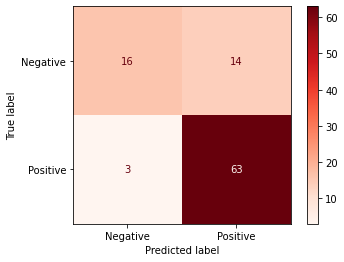

In [ ]:
plot_confusion_matrix(svc,X_test,Y_test, cmap ="Reds", display_labels=['Negative','Positive'])
plt.show()

In [ ]:
Y_prediction = svc.predict(X_test)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.82      0.95      0.88        66

    accuracy                           0.82        96
   macro avg       0.83      0.74      0.77        96
weighted avg       0.83      0.82      0.81        96

